In [4]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
# create a fictional potfolio
#FAANG
assets = ['ADBE','SPOT', 'BJ', 'DIS', 'BABA', 'FB','LOW', 'NLS', 'SONO', 'NEM' 
          ]


In [33]:
# assign weights to the stocks
weights = np.array([0.1,0.1,0.1,0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [34]:
start_date = '2010-01-01'
end_date = '2021-01-01'

In [35]:
# df to store adj close price
df = pd.DataFrame()

for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = start_date, end = end_date)['Adj Close']
  

In [36]:
df

,ADBE,SPOT,BJ,DIS,BABA,FB,LOW,NLS,SONO,NEM
Date,,,,,,,,,,
2010-01-04,37.090000,NaN,NaN,27.933924,NaN,NaN,18.957432,2.090000,NaN,40.073391
2010-01-05,37.700001,NaN,NaN,27.864237,NaN,NaN,18.760973,2.030000,NaN,40.180923
2010-01-06,37.619999,NaN,NaN,27.716166,NaN,NaN,18.810085,2.010000,NaN,41.032841
2010-01-07,36.889999,NaN,NaN,27.724878,NaN,NaN,19.350327,1.960000,NaN,40.768173
2010-01-08,36.689999,NaN,NaN,27.768419,NaN,NaN,19.309402,2.000000,NaN,41.041115
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,499.859985,328.390015,38.209999,173.729996,222.000000,267.399994,162.770004,20.870001,24.440001,60.480000
2020-12-28,498.950012,317.290009,37.080002,178.860001,222.360001,277.000000,162.039993,19.740000,23.570000,59.820000
2020-12-29,502.109985,318.429993,37.349998,177.300003,236.259995,276.779999,160.539993,18.100000,23.049999,59.730000


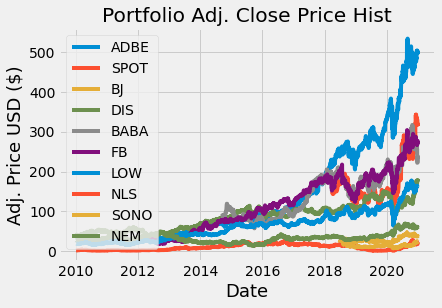

In [37]:
title = 'Portfolio Adj. Close Price Hist'

my_stocks = df
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label=c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price USD ($)', fontsize= 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()



In [38]:
# daily return
returns = df.pct_change()
returns

,ADBE,SPOT,BJ,DIS,BABA,FB,LOW,NLS,SONO,NEM
Date,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.016446,NaN,NaN,-0.002495,NaN,NaN,-0.010363,-0.028708,NaN,0.002683
2010-01-06,-0.002122,NaN,NaN,-0.005314,NaN,NaN,0.002618,-0.009852,NaN,0.021202
2010-01-07,-0.019405,NaN,NaN,0.000314,NaN,NaN,0.028721,-0.024876,NaN,-0.006450
2010-01-08,-0.005422,NaN,NaN,0.001570,NaN,NaN,-0.002115,0.020408,NaN,0.006695
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.005937,-0.007255,0.003414,0.001037,-0.133422,-0.002648,0.002093,-0.012305,-0.020833,0.011710
2020-12-28,-0.001820,-0.033801,-0.029573,0.029529,0.001622,0.035901,-0.004485,-0.054145,-0.035597,-0.010913
2020-12-29,0.006333,0.003593,0.007281,-0.008722,0.062511,-0.000794,-0.009257,-0.083080,-0.022062,-0.001505


In [39]:
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,ADBE,SPOT,BJ,DIS,BABA,FB,LOW,NLS,SONO,NEM
ADBE,0.092474,0.074210,0.048615,0.032936,0.045857,0.048243,0.037898,0.041919,0.071728,0.011662
SPOT,0.074210,0.206184,0.028824,0.050573,0.061268,0.071114,0.050962,0.052689,0.066810,0.010712
BJ,0.048615,0.028824,0.200607,0.010654,0.021049,0.033346,0.040198,0.033570,0.040169,0.005704
DIS,0.032936,0.050573,0.010654,0.062128,0.025026,0.027464,0.031561,0.028354,0.059175,0.008273
BABA,0.045857,0.061268,0.021049,0.025026,0.112626,0.045653,0.029988,0.034133,0.060041,0.008464
FB,0.048243,0.071114,0.033346,0.027464,0.045653,0.140076,0.032232,0.032310,0.062193,0.008324
LOW,0.037898,0.050962,0.040198,0.031561,0.029988,0.032232,0.078150,0.041079,0.076446,0.010264
NLS,0.041919,0.052689,0.033570,0.028354,0.034133,0.032310,0.041079,0.516430,0.075563,0.023409
SONO,0.071728,0.066810,0.040169,0.059175,0.060041,0.062193,0.076446,0.075563,0.433134,0.013264
NEM,0.011662,0.010712,0.005704,0.008273,0.008464,0.008324,0.010264,0.023409,0.013264,0.127823


In [40]:
# calculate portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.05417487345782576

In [41]:
# calculate portfolio volatility
port_volatility = np.sqrt(port_variance)
port_volatility

0.232754964410699

In [42]:
# calculate annual portfolio return
simple_annual_return = np.sum(returns.mean()*weights) * 252
simple_annual_return

0.27307614458067747

In [43]:
# expected annual return, volatility  and variance
percent_var = str( round(port_variance,2) *100) + '%'
percent_vols = str(round(port_volatility,2) * 100) + '%'
percent_ret = str(round(simple_annual_return,2)* 100) + '%'

print('Expected annual retudn: ' + percent_ret)
print('Annual volatility / risk: ' + percent_vols)
print(' Annual variance:' + percent_var )

Expected annual retudn: 27.0%
Annual volatility / risk: 23.0%
 Annual variance:5.0%


In [23]:
# optimizes portfolio to have higher returns and lower volatility
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 6.4MB/s 


In [44]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [45]:
# calculate the expected returns and the annualised sample covarience matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


OrderedDict([('ADBE', 0.27101), ('SPOT', 0.05164), ('BJ', 0.09101), ('DIS', 0.23346), ('BABA', 0.0), ('FB', 0.14856), ('LOW', 0.18801), ('NLS', 0.01631), ('SONO', 0.0), ('NEM', 0.0)])
Expected annual return: 23.5%
Annual volatility: 22.1%
Sharpe Ratio: 0.97


(0.23521358852803836, 0.22075179913234416, 0.9749120477111693)

In [46]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)
allocation, leftover = da.lp_portfolio()

print('Discrete Allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))



Discrete Allocation:  {'ADBE': 8, 'SPOT': 2, 'BJ': 37, 'DIS': 20, 'FB': 8, 'LOW': 18, 'NLS': 14}
Funds remaining: $38.34
